# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
df = pd.read_csv('data/human_body_temperature.csv')

In [59]:
''' Work is below
1. Based on the histogram plot of temperatures, the samples is very close to a normal distribution with a few outliers. 
    It seems safe to assume that the full population is normally distributed
    
2. N > 30 so the sample size is considered large enough (we have 130 samples). 
    Since each observation is a separate human they are all indepenent.

3. The true mean is 98.23 not 98.6. A one sample test should be used since we are comparing a population to a separate known/hypothesized value. 
    the t statistic should be used because we don't know the standard deviation of the population. 
     Using one sample t test: p = 1.0943732312e-07 
     Using one sample z test: p = 2.17615758294e-08
     This is a good place to discuss the idea that Wunderlich's mean temperature may be incorrect because the p-values are so small.
     Low p-values mean we should be rejecting the null hypothesis that Wunderlich's mean is equal to the mean of our sample.
     I would be skeptical of immediately accepting a conclusion that contradicts a value which has been widely accepted for over a century, 
     especially since 130 is an a small relative sample size compared to the human population. Repetitions should be down with more varied and larger sample sizes.
     
     
4. When drawing small samples of size 10 there are occasions where the calculated p-values lead to different conclusions.
    This shows the importance of choosing the correct statistic to use because you may accidentally think something is significant.
    The correct statistic to use in this case is the T-statistic. This is because the sample size is less than 30 and we do not know the std
    
5. Margin of error calculated from sample is: 0.0643044168379 
    Confidence interval from sample mean (98.133965658950885, 98.386034341049125)
    Confidence interval from Wunderlich's mean (98.473965658950874, 98.726034341049115)
    If someones temperature is outside of the confidence interval (98.1,98.4) then we should consider it abnormal. 
    
6. To compare samples of males and females I used an independent two sample t-test. Pairing males and females does not make sense due to the indiviual nature of humans.
    a t-test was used similar to the previous problems even though the sample size is above 30 because we do not know the standard deviation of the population.
    
    Story:
        For almost 120 years Wunderlich's estimated mean normal body temperature for humans of 98.6F was widely accepted.
    Using statistical analysis techniques on a sample of 130 people (65 male and 65 female) we determined that 98.6F may 
    not actually be correct. We used a one sample t-test with the null hypothesis that the mean temperature of our sample 
    is in fact 98.6, however low p-values, much lower than 0.05, suggest that there is statistical significance for the difference
    of the sample mean and Wunderlich's 98.6F. Plotting the temperatures in a histogram shows a normal distribution which lets us
    assume the population is a normal distribution as well and this sample is likely representative of it. Even so, repetitions 
    with larger samples sizes of this analysis should be done for confirmation. When considering that Wunderlich's accepted mean
    normal body temperature is incorrect we are presented with other assumptions that may be incorrect as well. Thus we define 
    a null hypothesis for the mean normal temperatures for the male sample and female sample to be the same. Using a independent
    two sample t-test since each individual is a separate identity, this resulted in a p-value of 0.01. Again a low p-value means
    we reject the null hypothesis and we have statistically significant data that points towards differing male and female mean
    normal body temperatures. 
    
        While we have found statistically significant results that should be representative of the total population more studies
    should be done to confirm this data. For example a quick search of lower body temperature shows that  cold weather can affect
    body temperature, since the physical location is not included it may have occured in a cold climate which potentially skews the 
    data and thus conclusions we have arrived at. 
         
'''

" Work is below\n1. Based on the histogram plot of temperatures, the samples is very close to a normal distribution with a few outliers. \n    It seems safe to assume that the full population is normally distributed\n    \n2. N > 30 so the sample size is considered large enough (we have 130 samples). \n    Since each observation is a separate human they are all indepenent.\n\n3. A one sample test should be used since we are comparing a population to a separate known/hypothesized value. \n    the t statistic should be used because we don't know the standard deviation of the population. \n     Using one sample test:\n     Using two sample test:\n         \n"

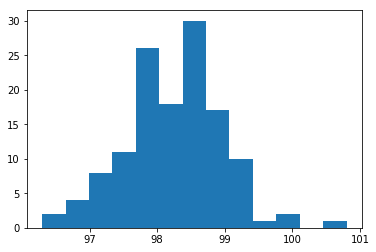

130


In [60]:
#plot sorted temperature values to get a visual, and count sample size
#Questions 1 & 2
_ = plt.hist(df.sort_values('temperature')['temperature'].tolist(), bins='auto')
plt.show()
print (len(df.temperature))

In [151]:
#Question 3:
mean = np.mean(df.temperature)
std = np.std(df.temperature)
print (mean)
test = (mean - 98.6)/(std/np.sqrt(len(df.temperature)))
print (test)

#The t statistic will calulate based on a polynomial with n-1 degrees of freedom 
#   and Z will calculate based on the normal distribution
# Thus we will use both methods from out test statistic and compare them
t_p = stats.t.cdf(test, df=129)
z_p = stats.norm.cdf(test)

print(t_p, z_p)

98.24923076923078
-5.47592520208
1.0943732312e-07 2.17615758294e-08


In [115]:
#Question 4:
sample10 = np.random.choice(df.temperature, size=10)
mean = np.mean(sample10)
std = np.std(sample10)
print (mean)
test = (mean - 98.6)/(std/np.sqrt(len(sample10)))
print (test)

#The t statistic will calulate based on a polynomial with n-1 degrees of freedom 
#   and Z will calculate based on the normal distribution
# Thus we will use both methods from out test statistic and compare them
t_p = stats.t.cdf(test, df=9)
z_p = stats.norm.cdf(test)

print(t_p, z_p)

98.26
-1.71638384298
0.0601124649319 0.0430459058846


In [139]:
#Question 5
conf_int_sample =stats.norm.interval(0.95, loc=mean, scale=stats.sem(df.temperature))
conf_int_real =stats.norm.interval(0.95, loc=98.6, scale=stats.sem(df.temperature))
print(stats.sem(df.temperature), conf_int_sample, conf_int_real)

0.0643044168379 (98.133965658950885, 98.386034341049125) (98.473965658950874, 98.726034341049115)


In [160]:
#Question 6 using an indepenent two sample t test to determine the mean differences between normal temperatures
male = df[df.gender == 'M'].temperature
female = df[df.gender == 'F'].temperature
meanM, meanF = np.mean(male), np.mean(female)
print(meanM, meanF)
stdM, stdF = np.std(male), np.std(female)
stdpooled = np.sqrt(((65-1)*stdM**2 + (65-1)*stdF**2)/(65+65-2))
sempooled = np.sqrt(stdpooled**2*(1/65 + 1/65))
t = ((meanM - meanF) - (98.6 - 98.6))/sempooled
p = stats.t.cdf(t, df=128)
print (t,p)

98.1046153846154 98.39384615384613
-2.30322028919 0.0114396399348


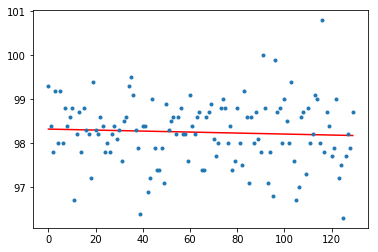

In [158]:
#plotting scatter and linear regression
a, b =np.polyfit(df.index, df.temperature, 1)
x = np.arange(len(df.temperature))
_ =  plt.plot(x,a*x + b, color='red')
_= plt.plot(df.index, df.temperature, marker='.', linestyle='None')
plt.show()